In [3]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import numpy as np
import torchvision
import torchvision.transforms as transforms


In [71]:
trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.3,0.3,0.3), (0.5,0.5,0.5))])
# 경로가 신기하네
#step1 dataset
trainset = torchvision.datasets.ImageFolder(root = "./", transform=trans)
#step2 dataloader
trainloader = DataLoader(trainset)
trainloader.

AttributeError: 'DataLoader' object has no attribute 'datasets'

In [49]:
datalier = iter(trainloader)
images, labels = datalier.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 5000, 5000)
(5000, 5000, 3)


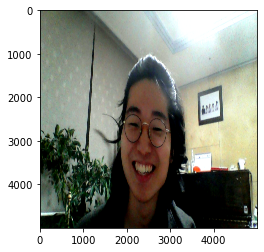

In [50]:
def imshow(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0))) # C * W * H형태로 나올 수 있게 만듬
    print(np_img.shape)
    print(np.transpose(np_img, (1,2,0)).shape)

imshow(torchvision.utils.make_grid(images))

In [74]:
# Ci 데이터를 사용해보자.
#trainset = torchvision.datasets.CIFAR10(root = "./img",train = True, download= True)
trainset = torchvision.datasets.ImageFolder(root = "./", transform= trans)
train_loader = DataLoader(trainset, batch_size = 1)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 100, 100)
(100, 100, 3)


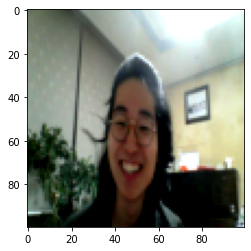

In [75]:
temp = iter(train_loader)
image, label = temp.next()

imshow(torchvision.utils.make_grid(image))

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential(
            #3*100*100 --> 5*100*100
            nn.Conv2d(3,5,kernel_size= 3, padding=1), 
            nn.MaxPool2d(2), 
            nn.ReLU(),
            
            
            # 5*50*50 --> 10*40*40
            nn.Conv2d(5,10, kernel_size= 11)
            nn.MaxPool2d(2),
            nn.ReLU(),
            
            # 10*20*20 --> 20*20*20
            nn.Conv2d(10,20, kernel_size=3, padding= 1)
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        
        
    def forward(self,x):
        y_ = self.net(x)
        return y_
        
        